# Load tweets into a text file

In [49]:
import tweepy
import config 
import json
from tweepy import OAuthHandler

auth = OAuthHandler(config.consumer_key,config.consumer_secret)
auth.set_access_token(config.access_token,config.access_secret)
api = tweepy.API(auth)

def store(tweet):
    output.write(json.dumps(tweet)+"\n")

file_name = "trumptweets.txt"
output = open(file_name,"w")

num_tweets = 200 # number of tweets to retrieve
for tweet in tweepy.Cursor(api.user_timeline, id="realDonaldTrump").items(num_tweets):
    store(tweet._json)
    
output.close()


# Parse JSON data

200


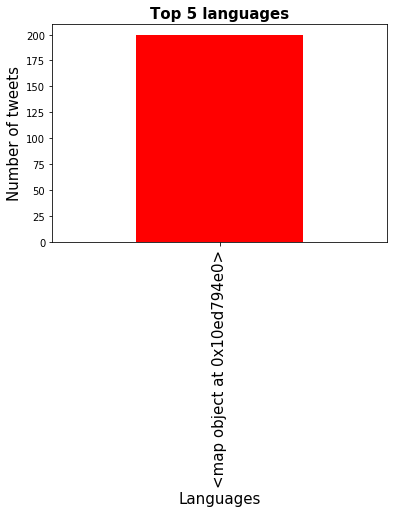

In [50]:
import json
import pandas as pd # library for data manipulation
import matplotlib.pyplot as plt

data_path = 'trumptweets.txt'

# load array with tweets
data = []
tweets_file = open(data_path,"r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        data.append(tweet)
    except:
        continue

# print number of tweets
print(len(data)) 

tweets = pd.DataFrame()
tweets['text'] = map(lambda tweet: tweet['text'], data)
tweets['lang'] = map(lambda tweet: tweet['lang'], data)

tweets_by_lang = tweets['lang'].value_counts()

fig,ax=plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')
plt.show()

